In [23]:
import pandas as pd
import numpy as np
from aeroevap import Aero
from IPython.display import IFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
AFClean_path ='C:\DRI\ReservoirEvap\CleanedBokeh\AFClean.csv'

In [25]:
AFcalc_df = pd.read_csv(AFClean_path, index_col = "real_date", na_values= np.nan)

In [26]:
#convert pressure column to correct units
AFcalc_df['BPelev_mb_Avg'] = AFcalc_df['elev_pressure_kpa']*10

In [27]:
Aero_empty = Aero()
Aero_with_df = Aero(AFcalc_df)

In [28]:
Aero_empty.df is None

True

In [29]:
Aero_empty.df = AFcalc_df

In [30]:
# the data has been added
Aero_empty.df.tail()

,Buoy,ws_ms_avg,wind_direction_avg,swin_avg,swout_avg,lwin_corr_avg,lwout_corr_avg,atemp_avg,r_humidity_avg,bp_kpa_avg,...,WaterTemp_35M,WaterTemp_40M,WaterTemp_45M,WaterTemp_50M,WaterTemp_75M,WaterTemp_96M,WaterTemp_111M,elevation,elev_pressure_kpa,BP_mb_Avg
real_date,,,,,,,,,,,,,,,,,,,,,
2015-11-15 09:00:00,AF,3.201571,NaN,NaN,NaN,NaN,NaN,-0.415,NaN,89.31443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323.06,86.663807,866.638075
2015-11-15 09:30:00,AF,3.543000,204.0,NaN,NaN,NaN,NaN,0.138,0.138,89.32478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323.06,86.663807,866.638075
2015-11-15 10:00:00,AF,3.543000,205.6,NaN,NaN,NaN,NaN,0.678,0.678,89.34755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323.06,86.663807,866.638075
2015-11-15 10:30:00,AF,2.850000,204.8,NaN,NaN,NaN,NaN,1.335,1.335,89.33864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323.06,86.663807,866.638075
2015-11-15 11:00:00,AF,3.790000,219.6,NaN,NaN,NaN,NaN,2.208,2.208,89.35052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323.06,86.663807,866.638075


In [31]:
# !!!
# make a naming dict to match up columns with Aero variable names
names = {
    'real_date' : 'date',
    'ws_ms_avg' : 'WS',
    'atemp_avg' : 'T_air',
    'r_humidity_avg' : 'RH',
    #'' : 'SH', # ??
    #'' : 'dt', # ??
    'water_skin_temp_corr_avg' : 'T_skin',
    'BPelev_mb_Avg' : 'P'
}

In [33]:
np.seterr('ignore')
# create a new Aero object and calculate evaporation on all rows
A = Aero(AFClean_df)
A.run(sensor_height=2, timestep=1800, variable_names=names)

ERROR: missing on or more needed columns for calculation:
date, WS, P, T_air, T_skin, RH, SH, dt


In [20]:
#make sure the data looks okay
A.df[['E', 'Ce', 'VPD', 'stability']].tail()

,E,Ce,VPD,stability
real_date,,,,
2015-11-15 09:00:00,NaN,NaN,NaN,NaN
2015-11-15 09:30:00,0.088163,0.002329,0.727477,-0.256671
2015-11-15 10:00:00,0.093993,0.002355,0.767022,-0.283769
2015-11-15 10:30:00,0.084958,0.002539,0.799997,-0.420941
2015-11-15 11:00:00,0.090003,0.002151,0.755885,-0.106392


Text(0, 0.5, 'evaporation mm/30 min')

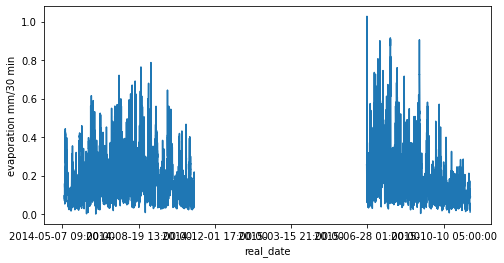

In [21]:
#View the calculated evaporation
plt.figure(figsize=(8,4))
A.df.E.plot()
plt.ylabel('evaporation mm/30 min')

In [22]:
#The calculated open-water evaporation is shown below after creating a daily sum
plt.figure(figsize=(8,4))
A.df.E.resample('D').sum().plot()
plt.ylabel('evaporation mm/day')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

<Figure size 576x288 with 0 Axes>

In [ ]:
#wind speed relation versus the calculated evaporation
plt.figure(figsize=(8,4))
plt.scatter(A.df.WSPD.resample('D').mean(), A.df.E.resample('D').sum())
plt.ylabel('evaporation mm/day')
plt.xlabel('mean daily wind speed m/s')

In [ ]:
#Monin-Obhukov Similarity Theory stability parameter (z/L) for relating the wind speed to the bulk transfer coefficient
stable = np.real(A.df.stability) > 0 
unstable = np.real(A.df.stability) < 0
neutral = np.real(A.df.stability) == 0

plt.figure(figsize=(8,6))
plt.scatter(A.df.WSPD[stable], A.df.Ce[stable], marker='x', color='blue', label='stable')
plt.scatter(A.df.WSPD[unstable], A.df.Ce[unstable], marker='x', color='red', label='unstable')
plt.scatter(A.df.WSPD[neutral], A.df.Ce[neutral], marker='o', color='black', label='neutral')
plt.ylim(0,0.006)
plt.ylabel(r'$C_e$', fontsize=12)
plt.xlabel('Wind speed m/s')
plt.legend()